In [1]:
# https://www.youtube.com/watch?v=0B5eIE_1vpU

In [2]:
from sklearn.datasets import load_boston

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
# X
# y

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
mod = KNeighborsRegressor()

In [7]:
mod.fit(X, y)

KNeighborsRegressor()

In [8]:
pred = mod.predict(X)

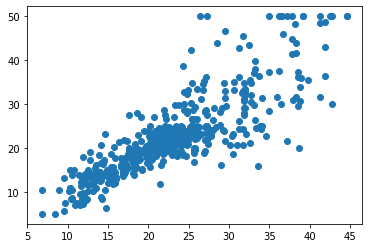

In [9]:
from matplotlib import pyplot as plt

plt.scatter(pred, y)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
# mod = KNeighborsRegressor()
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [12]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [13]:
pred = pipe.predict(X)

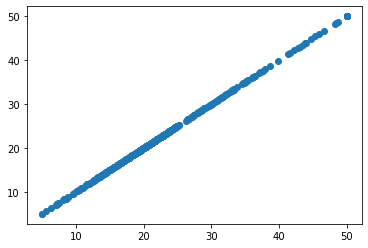

In [14]:
plt.scatter(pred, y)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [16]:
# mod = KNeighborsRegressor()
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [17]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [18]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors': [i for i in range(1,11)]},
            cv=3)

In [19]:
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [20]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002636,0.000269,0.003522,0.000680,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001546,0.000359,0.001902,0.000382,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001886,0.000428,0.002945,0.000213,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001854,0.000143,0.002762,0.000560,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001078,0.000224,0.001471,0.000057,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000906,0.000112,0.001495,0.000264,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000927,0.000127,0.001493,0.000223,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000978,0.000111,0.001557,0.000216,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000986,0.000110,0.001611,0.000128,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000999,0.000049,0.001658,0.000205,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [ ]:
# standard template

# load the data
X, y = load_boston(return_X_y=True)

pipe = Pipeline(
    [
        ("scale", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=1))
    ]
)

mod = GridSearchCV(
    estimator=pipe,
    param_grid={"model__n_neighbors": [i for i in range(1,11)]},
    cv=3
)

mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

In [21]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu